In [3]:
import pandas as pd
import torch
import ast
from transformers import BertForSequenceClassification
from sklearn.metrics import f1_score, r2_score

df = pd.read_csv('tokenized_test_data.csv')

df['input_ids'] = df['input_ids'].apply(ast.literal_eval)
df['attention_mask'] = df['attention_mask'].apply(ast.literal_eval)

model_path = 'C:/workRepo/CS/CS6140 Projcet/CS6140-MUGC-project/results/checkpoint-4416/'
model = BertForSequenceClassification.from_pretrained(model_path)

device = torch.device("cuda")
model.to(device)

input_ids = torch.tensor(df['input_ids'].tolist()).to(device)
attention_mask = torch.tensor(df['attention_mask'].tolist()).to(device)

true_labels = df['label'].tolist()

model.eval()

batch_size = 16

predictions = []

for i in range(0, len(input_ids), batch_size):
    batch_input_ids = input_ids[i:i + batch_size]
    batch_attention_mask = attention_mask[i:i + batch_size]
    
    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1)
        predictions.extend(batch_predictions.cpu().tolist())

f1 = f1_score(true_labels, predictions, average='weighted')
print("F1 Score:", f1)

try:
    r2 = r2_score(true_labels, predictions)
    print("R² Score:", r2)
except ValueError as e:
    print("R² Score calculation error:", e)


F1 Score: 0.9989808725097549
R² Score: 0.9922710174088006


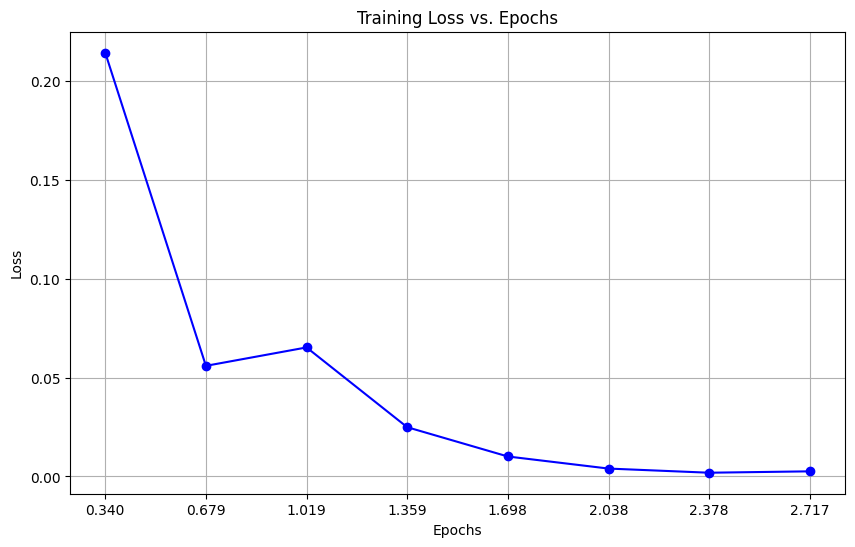

In [4]:
import matplotlib.pyplot as plt

# Log history data from your training output
log_history = [
    {
        "epoch": 0.33967391304347827,
        "grad_norm": 6.073151111602783,
        "learning_rate": 4.433876811594203e-05,
        "loss": 0.2141,
        "step": 500
    },
    {
        "epoch": 0.6793478260869565,
        "grad_norm": 3.105067253112793,
        "learning_rate": 3.867753623188406e-05,
        "loss": 0.0559,
        "step": 1000
    },
    {
        "epoch": 1.0,
        "eval_loss": 0.05884401500225067,
        "eval_runtime": 500.9251,
        "eval_samples_per_second": 5.879,
        "eval_steps_per_second": 0.737,
        "step": 1472
    },
    {
        "epoch": 1.0190217391304348,
        "grad_norm": 0.06665965169668198,
        "learning_rate": 3.3016304347826086e-05,
        "loss": 0.0652,
        "step": 1500
    },
    {
        "epoch": 1.358695652173913,
        "grad_norm": 0.007173337507992983,
        "learning_rate": 2.7355072463768118e-05,
        "loss": 0.0249,
        "step": 2000
    },
    {
        "epoch": 1.6983695652173914,
        "grad_norm": 0.00826453510671854,
        "learning_rate": 2.1693840579710144e-05,
        "loss": 0.0101,
        "step": 2500
    },
    {
        "epoch": 2.0,
        "eval_loss": 0.0029821477364748716,
        "eval_runtime": 506.0445,
        "eval_samples_per_second": 5.82,
        "eval_steps_per_second": 0.729,
        "step": 2944
    },
    {
        "epoch": 2.0380434782608696,
        "grad_norm": 0.0034247031435370445,
        "learning_rate": 1.6032608695652173e-05,
        "loss": 0.004,
        "step": 3000
    },
    {
        "epoch": 2.3777173913043477,
        "grad_norm": 0.0018719038926064968,
        "learning_rate": 1.0371376811594203e-05,
        "loss": 0.0019,
        "step": 3500
    },
    {
        "epoch": 2.717391304347826,
        "grad_norm": 0.001649424433708191,
        "learning_rate": 4.710144927536232e-06,
        "loss": 0.0026,
        "step": 4000
    }
]

# Extract epochs and losses
epochs = [entry['epoch'] for entry in log_history if 'loss' in entry]
losses = [entry['loss'] for entry in log_history if 'loss' in entry]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', color='b', linestyle='-')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Set x-ticks to be the epochs
plt.grid()
plt.show()
